In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.featureScheduler.utils import standard_goals

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA', 'filter'].
Found 2004181 visits
Running:  ['opsim_Count_filter_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 735 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 614.372  dipole: lon: 38.9659, lat: -82.709, amp: 277.278
Plotting complete.


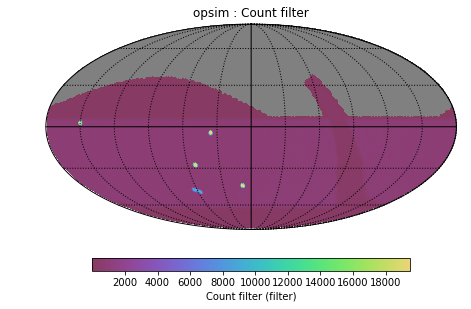

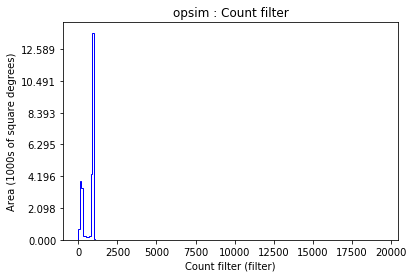

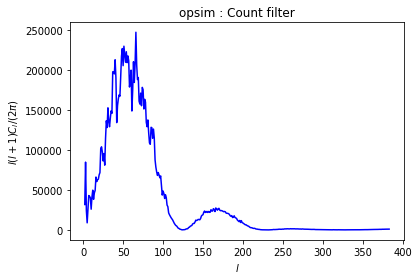

In [2]:
dbFile = 'baseline_nexp2_scaleddown_v1.5_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
bundleList = []
plotDict={}

sql = '' 
metric = metrics.CountMetric(col='filter')
slicer = slicers.HealpixSlicer()
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

bg = metricBundles.MetricBundleGroup(bundleList, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

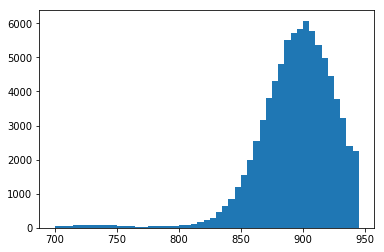

In [3]:

bins = np.arange(700,950, 5)
ack=plt.hist(bundleList[0].metricValues, bins=bins)

In [4]:
# Check that the WFD area is about right. 
np.where(bundleList[0].metricValues >= 825)[0].size*hp.nside2pixarea(128, degrees=True)

18017.955975393328

N visits spent over-exposing 3090.0868635404886


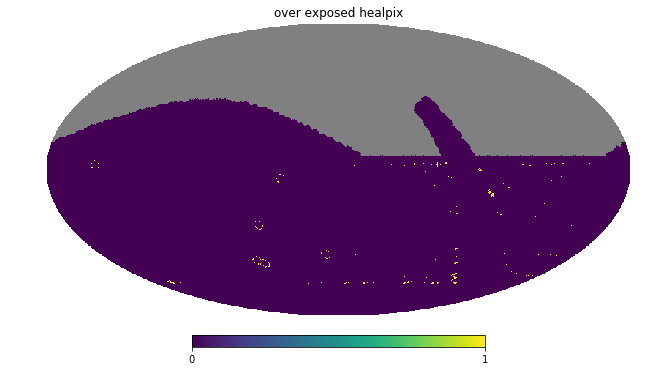

In [5]:
over = np.where((bundleList[0].metricValues > 980) & (bundleList[0].metricValues < 3000))[0]

ack = bundleList[0].metricValues*0
ack[over] = 1
hp.mollview(ack, title='over exposed healpix')

tot = np.sum(bundleList[0].metricValues[over]-825)* hp.nside2pixarea(128, degrees=True) / 9.6
print('N visits spent over-exposing', tot)

Visits spent outside target footprint 20606.669797625796


/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


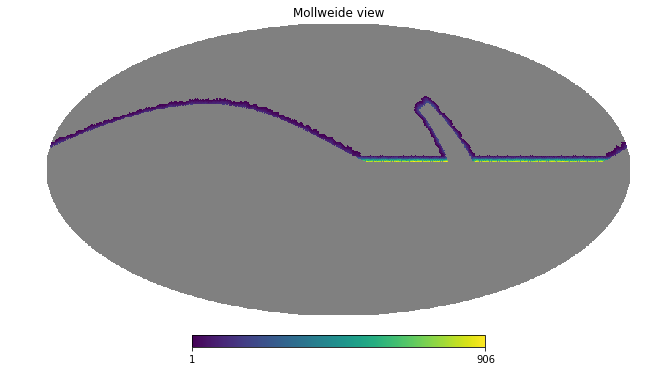

In [6]:
sg = standard_goals(nside=128)
outside = np.where(sg['r'] == 0)[0]
inside = np.where(sg['r'] > 0)[0]
ack = bundleList[0].metricValues + 0
ack[inside] = np.nan
hp.mollview(ack)

tot = np.nansum(ack)* hp.nside2pixarea(128, degrees=True) / 9.6
print('Visits spent outside target footprint', tot)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA', 'filter'].
Found 2372700 visits
Running:  ['opsim_Count_filter_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 1145 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 806.901  dipole: lon: -47.5795, lat: -81.3218, amp: 199.414
Plotting complete.


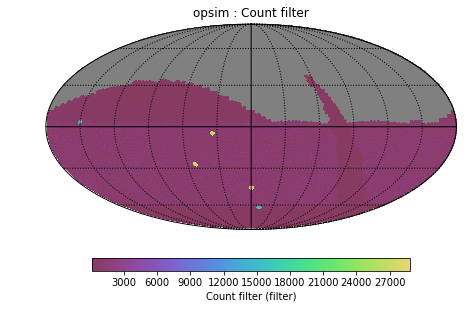

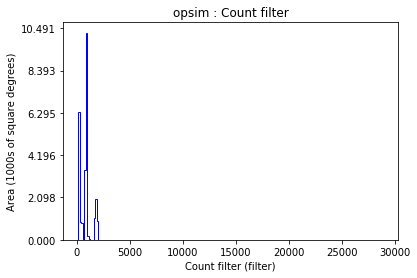

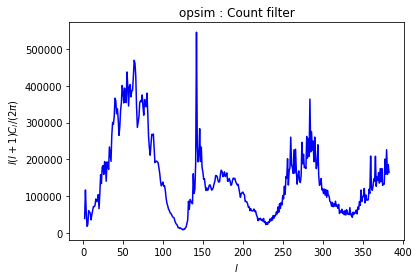

In [7]:
dbFile = 'baseline2018a.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
bundleList = []
plotDict={}

sql = '' 
metric = metrics.CountMetric(col='filter')
slicer = slicers.HealpixSlicer()
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

bg = metricBundles.MetricBundleGroup(bundleList, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

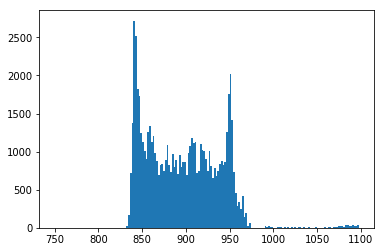

In [8]:
bins=np.arange(750,1100, 2)
ack = plt.hist(bundleList[0].metricValues, bins=bins)

N visits spent over-exposing 411423.4496977308


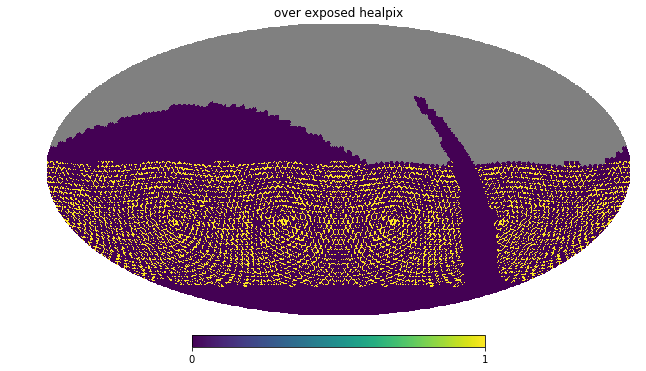

In [9]:
over = np.where((bundleList[0].metricValues > 980) & (bundleList[0].metricValues < 3000))[0]

ack = bundleList[0].metricValues*0
ack[over] = 1
hp.mollview(ack, title='over exposed healpix')

tot = np.sum(bundleList[0].metricValues[over]-825)* hp.nside2pixarea(128, degrees=True) / 9.6
print('N visits spent over-exposing', tot)

In [10]:
# Check that the WFD area is about right. 
np.where(bundleList[0].metricValues > 825)[0].size*hp.nside2pixarea(128, degrees=True)

18055.304542605227